In [1]:
import numpy as np
import numpy.linalg as LA
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(suppress=True, precision=3)

In [3]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

N, V = X.shape

### cetering 

In [4]:
# Y = np.subtract(X , np.mean(X, axis=0))
ma = np.max(X, axis=0)  # maximum 
mi = np.min(X, axis=0)  # minumu
Y = np.divide(np.subtract(X, mi), np.subtract(ma, mi))
Y.shape

(150, 4)

In [5]:
Y[:2, :]

array([[0.222, 0.625, 0.068, 0.042],
       [0.167, 0.417, 0.068, 0.042]])

In [6]:
Y[-2:, :]

array([[0.528, 0.583, 0.746, 0.917],
       [0.444, 0.417, 0.695, 0.708]])

### Data scatter

In [7]:
data_scatter = np.sum(np.power(Y, 2))
print("data_scatter", data_scatter)

data_scatter 162.09724865539914


#### Singular Value Decomposition.


In [8]:
# U, s, V'
# 2D array of singula vectors, 1D array of a’s singular values,   
z, mu, c = LA.svd(Y)
print("z shape:", z.shape, "mu shape:", mu.shape, "c shape:", c.shape)

z shape: (150, 150) mu shape: (4,) c shape: (4, 4)


In [9]:
zc = z[:4, :4]  # z correct

In [10]:
c

array([[-0.487, -0.391, -0.553, -0.552],
       [ 0.015,  0.89 , -0.308, -0.336],
       [-0.797,  0.22 , -0.015,  0.562],
       [ 0.357, -0.079, -0.774,  0.517]])

### The impact of each feature with regarding the data scatter

In [11]:
np.divide((np.power(mu, 2))*100, data_scatter)

array([89.723,  9.123,  0.932,  0.222])

In [12]:
c0 = c[:, 0]
c0

array([-0.487,  0.015, -0.797,  0.357])

In [13]:
z0 = -z[:, 0]
z0

array([0.034, 0.025, 0.025, 0.024, 0.034, 0.049, 0.029, 0.033, 0.018,
       0.025, 0.041, 0.031, 0.022, 0.014, 0.047, 0.058, 0.046, 0.036,
       0.049, 0.041, 0.039, 0.042, 0.027, 0.04 , 0.033, 0.028, 0.037,
       0.036, 0.034, 0.027, 0.027, 0.041, 0.042, 0.048, 0.027, 0.028,
       0.038, 0.031, 0.019, 0.034, 0.034, 0.012, 0.022, 0.042, 0.046,
       0.026, 0.04 , 0.025, 0.04 , 0.03 , 0.1  , 0.094, 0.101, 0.064,
       0.09 , 0.077, 0.097, 0.047, 0.089, 0.067, 0.044, 0.083, 0.062,
       0.086, 0.07 , 0.093, 0.082, 0.068, 0.078, 0.063, 0.096, 0.077,
       0.086, 0.081, 0.084, 0.09 , 0.093, 0.102, 0.085, 0.06 , 0.06 ,
       0.057, 0.07 , 0.089, 0.08 , 0.094, 0.097, 0.076, 0.075, 0.066,
       0.069, 0.086, 0.069, 0.047, 0.072, 0.075, 0.076, 0.082, 0.05 ,
       0.073, 0.125, 0.092, 0.121, 0.103, 0.116, 0.132, 0.071, 0.119,
       0.103, 0.14 , 0.109, 0.101, 0.115, 0.09 , 0.103, 0.115, 0.106,
       0.147, 0.134, 0.08 , 0.124, 0.092, 0.129, 0.095, 0.119, 0.12 ,
       0.094, 0.096,

In [14]:
zm = np.min(z0)
zM = np.max(z0)
print(zm, zM)

0.01243870611302252 0.14676469626910174


In [15]:
z0c = 100*(z0-zm)/(zM-zm)
z0c

array([ 16.235,   9.538,   9.301,   8.619,  16.406,  27.335,  12.476,
        14.974,   4.36 ,   9.703,  21.328,  13.883,   7.284,   1.376,
        25.947,  33.71 ,  25.02 ,  17.654,  27.414,  21.25 ,  19.469,
        21.663,  10.753,  20.217,  15.62 ,  11.529,  18.39 ,  17.648,
        16.064,  11.037,  10.866,  21.149,  22.263,  26.613,  11.122,
        11.226,  18.994,  14.153,   4.786,  15.808,  16.241,   0.   ,
         6.798,  22.234,  24.984,  10.122,  20.41 ,   9.046,  20.494,
        13.389,  65.198,  60.453,  65.935,  38.16 ,  57.843,  47.751,
        63.201,  25.851,  56.846,  40.52 ,  23.82 ,  52.533,  37.07 ,
        54.671,  42.714,  59.953,  51.766,  41.008,  48.727,  37.589,
        62.274,  48.195,  54.894,  50.828,  53.441,  58.113,  60.085,
        66.677,  54.098,  35.695,  35.17 ,  33.173,  42.688,  56.978,
        50.097,  60.545,  63.108,  47.151,  46.613,  40.171,  42.073,
        55.098,  42.262,  25.68 ,  44.175,  46.607,  47.021,  51.772,
        28.208,  45.

### Data Visualization
#### Data standardization

In [67]:
mean = np.mean(X, axis=0)
std = np.mean(X, axis=0)
rng  = np.ptp(X, axis=0)

Yz = np.divide(np.subtract(X, mean), std)  # Z-scoring
Yr = np.divide(np.subtract(X, mean), rng)  # rng-scoring


In [68]:
Yz[89:93, :]

array([[-0.059, -0.182,  0.064,  0.084],
       [-0.059, -0.15 ,  0.171,  0.001],
       [ 0.044, -0.019,  0.224,  0.167],
       [-0.007, -0.15 ,  0.064,  0.001]])

In [69]:
Yr[89:93, :]

array([[-0.095, -0.232,  0.041,  0.042],
       [-0.095, -0.191,  0.109,  0.   ],
       [ 0.071, -0.024,  0.143,  0.084],
       [-0.012, -0.191,  0.041,  0.   ]])

In [70]:
zz, muz, cz = LA.svd(Yz)  # compute svd for Yz
zr, mur, cr = LA.svd(Yr)  # compute svd for Yr

In [71]:
print("muz:", muz)
print("mur:", mur)

muz: [9.701 1.698 1.343 0.545]
mur: [5.885 2.199 1.196 0.513]


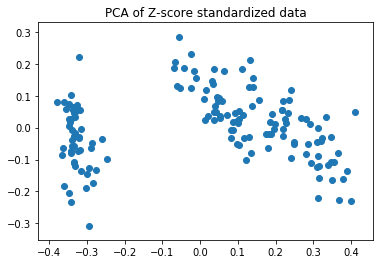

In [72]:
zz0 = zz[:, 0]*np.sqrt(muz[0])
zz1 = zz[:, 1]*np.sqrt(muz[1])

plt.scatter(zz0, zz1)
plt.title("PCA of Z-score standardized data")
plt.show()

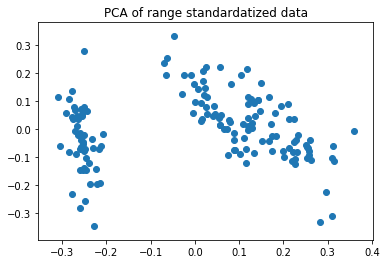

In [73]:
zr0 = zr[:, 0]*np.sqrt(mur[0])
zr1 = zr[:, 1]*np.sqrt(mur[1])

plt.scatter(zr0, zr1)
plt.title("PCA of range standardatized data")
plt.show()

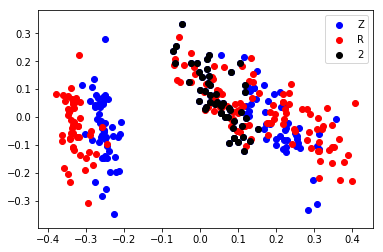

In [74]:
fig = plt.figure()  # figsize=(10, 15)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(zr0, zr1, c='b')
ax = fig.add_subplot(1, 1, 1)
ax.scatter(zz0, zz1, c='r')
ax.scatter(zr0[50: 100], zr1[50:100], c='k')
plt.legend("Z" + "R" + "2")
plt.show()

### Conventional PCA